# Explainability of the model

In [1]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

The aim is to use these features to predict the nature of the tumor. We first load the "Breast Cancer Wisconsin" dataset:

In [2]:
random_state = 42

# Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column to the DataFrame
df['target'] = data.target

X = df.drop('target', axis=1)  # Features
y = df['target']  # Target variable

# df = pd.concat([X, y], axis=1)
print(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32


Logistic Regression

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32
[0 1]

Confusion Matrix for Logistic Regression:
[[40  3]
 [ 1 70]]
Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


ROC AUC Score: 0.9951


C:\Users\habir\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


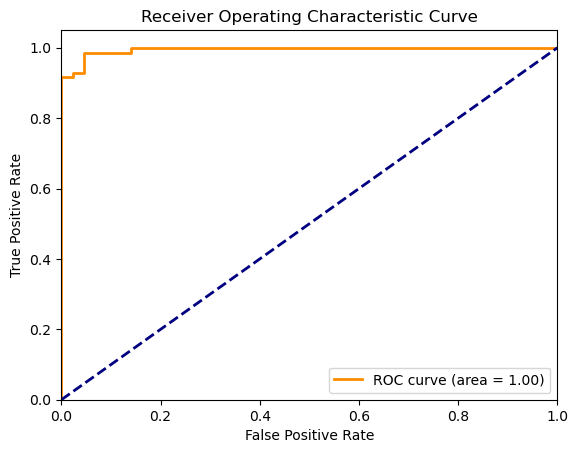

In [3]:
print(y)
print(y.unique())

# Create and fit the Logistic Regressor model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculating the metrics
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix for Logistic Regression:")
print(conf_matrix)

print('Classification report for Logistic Regression:')
print(class_report)

# ROC AUC score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"\nROC AUC Score: {roc_auc:.4f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Evaluating the performance of the classifier is crucial to understand how well it fits the data. We use accuracy to evaluate the generalization performance of the classifier


Confusion Matrix for Random Forest:
[[40  3]
 [ 1 70]]
Classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


ROC AUC Score: 0.9951


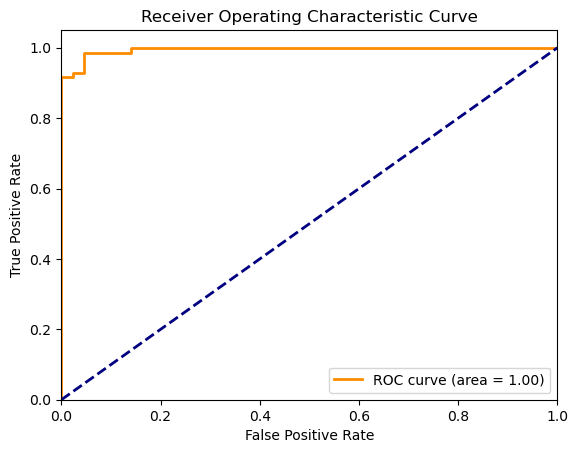

In [4]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=1)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Calculating the metrics
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix for Random Forest:")
print(conf_matrix)

print('Classification report for Random Forest:')
print(class_report)

# ROC AUC score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"\nROC AUC Score: {roc_auc:.4f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


Confusion Matrix for SVC:
[[37  6]
 [ 0 71]]
Classification report for SVC:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114


ROC AUC Score: 0.9934


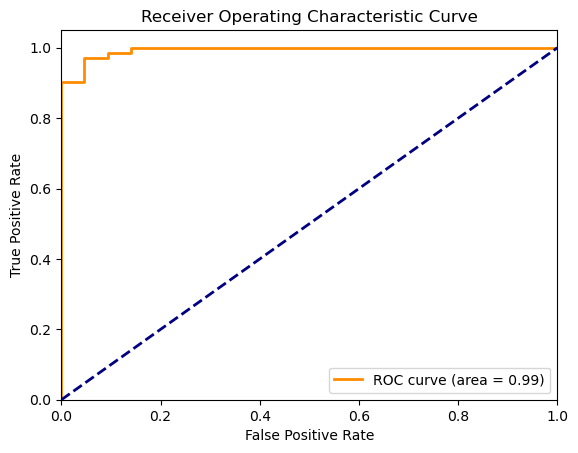

In [5]:
svc = SVC(random_state=6, probability=True)

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
y_pred_decision = svc.decision_function(X_test)

# Calculating the metrics
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix for SVC:")
print(conf_matrix)

print('Classification report for SVC:')
print(class_report)

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_decision)
print(f"\nROC AUC Score: {roc_auc:.4f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_decision)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

computing the odds ration for each coefficient $\beta_j$ using the following formula: $odds_j = e^{\beta_j}$

In [6]:
# Retrieve the coefficients and feature names
coefficients = model.coef_
print(coefficients)
feature_names = data.feature_names
print(feature_names)

# Computing odds ratio
feature_importance = np.exp(coefficients).squeeze()

[[ 1.49355754  0.45416427  0.04476846 -0.00342512 -0.05831454 -0.27567901
  -0.38115477 -0.1636349  -0.08705578 -0.01762943  0.05028919  0.67732266
   0.07152809 -0.13092521 -0.00546285 -0.05566811 -0.07722134 -0.02099009
  -0.0205218  -0.00487557  1.5650947  -0.6131464  -0.13414684 -0.02814089
  -0.10349272 -0.82908584 -1.02532534 -0.30174104 -0.28041009 -0.07737683]]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


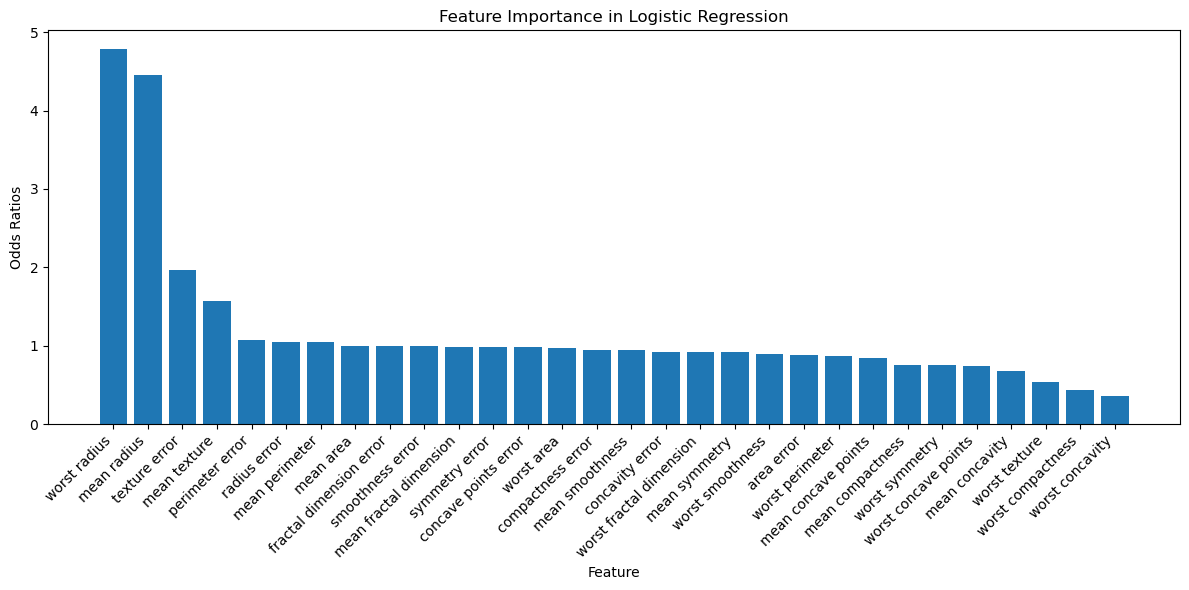

In [7]:
# Create a DataFrame to store the coefficients with their corresponding feature names
coeff_df = pd.DataFrame({'Feature': feature_names, 'OR': feature_importance})

# Sort the DataFrame by coefficient magnitude in descending order
coeff_df = coeff_df.reindex(coeff_df['OR'].abs().sort_values(ascending=False).index)

# Create a bar plot to visualize coefficient magnitudes
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.bar(coeff_df['Feature'], coeff_df['OR'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Odds Ratios')
plt.title('Feature Importance in Logistic Regression')
plt.tight_layout()
plt.show()

Calculating Feature Importance using the bagging approach for robustness

C:\Users\habir\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\habir\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\habir\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/sta

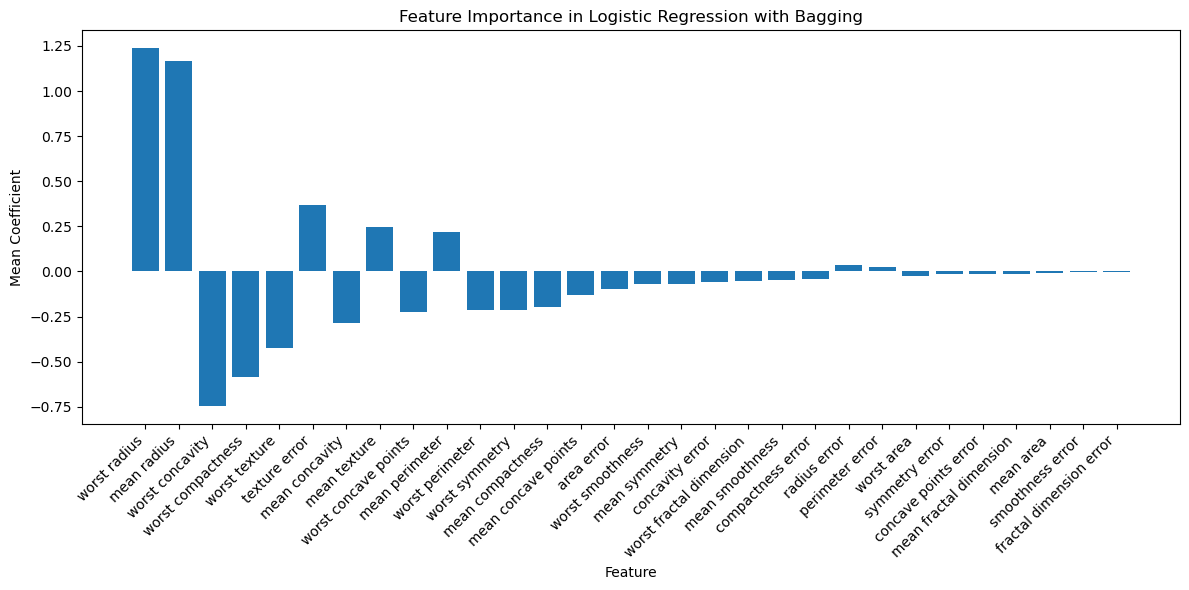

In [8]:
from sklearn.ensemble import BaggingClassifier

# Create a BaggingClassifier with Logistic Regression as the base estimator
bagging_model = BaggingClassifier(base_estimator=model, n_estimators=10, random_state=42)

# Train the BaggingClassifier on the training data
bagging_model.fit(X_train, y_train)

# Access the individual Logistic Regression models within the BaggingClassifier
individual_models = bagging_model.estimators_

# Calculate feature importance based on individual models
feature_importance = np.mean([model.coef_ for model in individual_models], axis=0)

# Assuming you have feature names available, you can create a DataFrame
coeff_df = pd.DataFrame({'Feature': feature_names, 'Mean_Coefficient': feature_importance[0]})

# Sort the DataFrame by coefficient magnitude in descending order
coeff_df = coeff_df.reindex(coeff_df['Mean_Coefficient'].abs().sort_values(ascending=False).index)

# Create a bar plot to visualize feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(coeff_df['Feature'], coeff_df['Mean_Coefficient'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Mean Coefficient')
plt.title('Feature Importance in Logistic Regression with Bagging')
plt.tight_layout()
plt.show()
